---
* Task 1: Student Score Prediction
* Omar Hamdy Abdelazim
----


## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

## Data

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
num_cols = []
cat_cols = []
null_cols = []

for col in df.columns:
    if df[col].dtype != 'object':
        num_cols.append(col)
    else:
        cat_cols.append(col)

for col in df.columns:
    if df[col].isnull().any():
        null_cols.append(col)

print("Categorical features:", cat_cols)
print("-"*50)
print("Numerical features:", num_cols)
print("-"*50)
print("Features with null values:", null_cols)

Categorical features: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
--------------------------------------------------
Numerical features: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
--------------------------------------------------
Features with null values: ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']


In [8]:
df["Teacher_Quality"].unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [9]:
df["Parental_Education_Level"].unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [10]:
df["Distance_from_Home"].unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

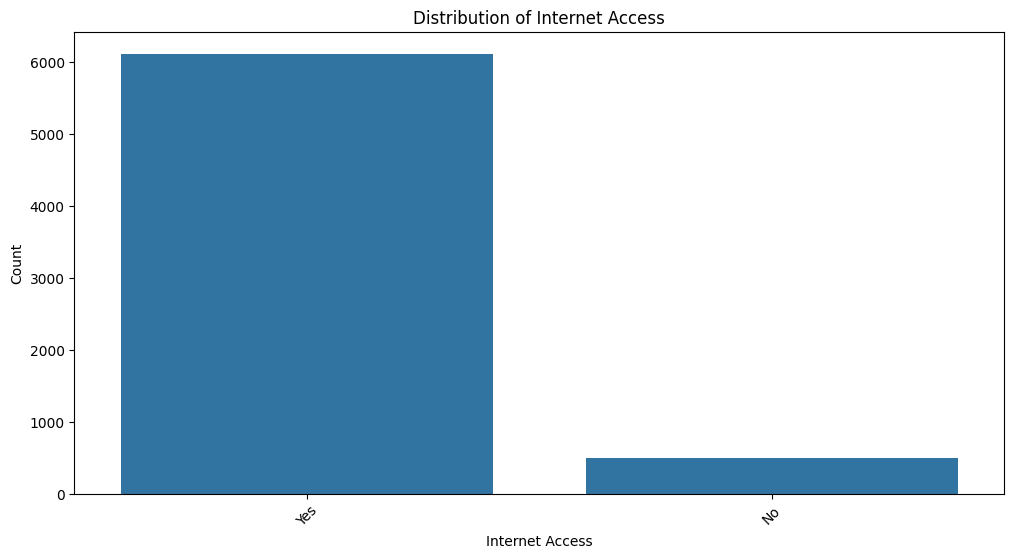

In [11]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x = "Internet_Access")
plt.title("Distribution of Internet Access")
plt.xlabel("Internet Access")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

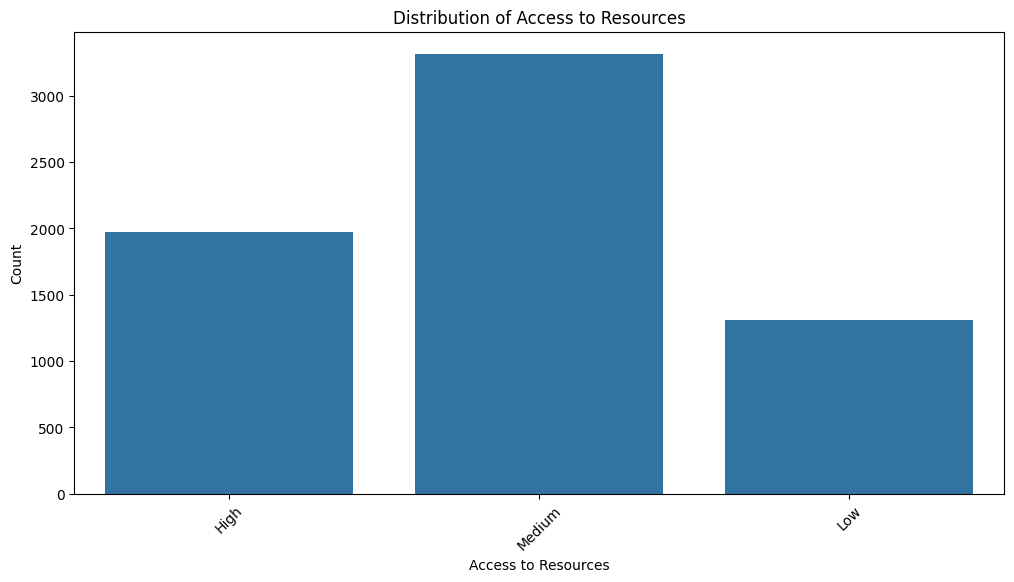

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x = "Access_to_Resources")
plt.title("Distribution of Access to Resources")
plt.xlabel("Access to Resources")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


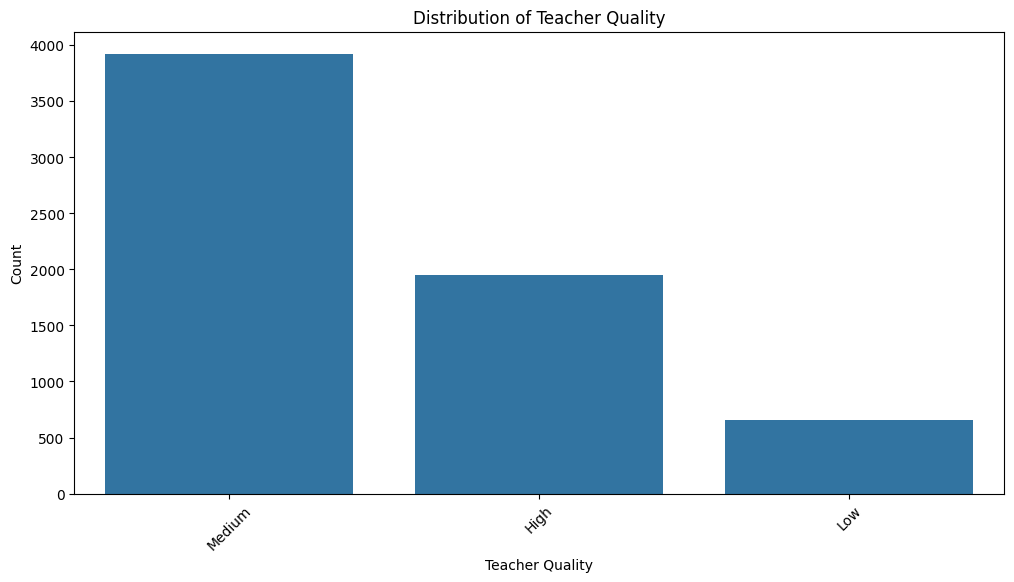

In [13]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x = "Teacher_Quality")
plt.title("Distribution of Teacher Quality")
plt.xlabel("Teacher Quality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

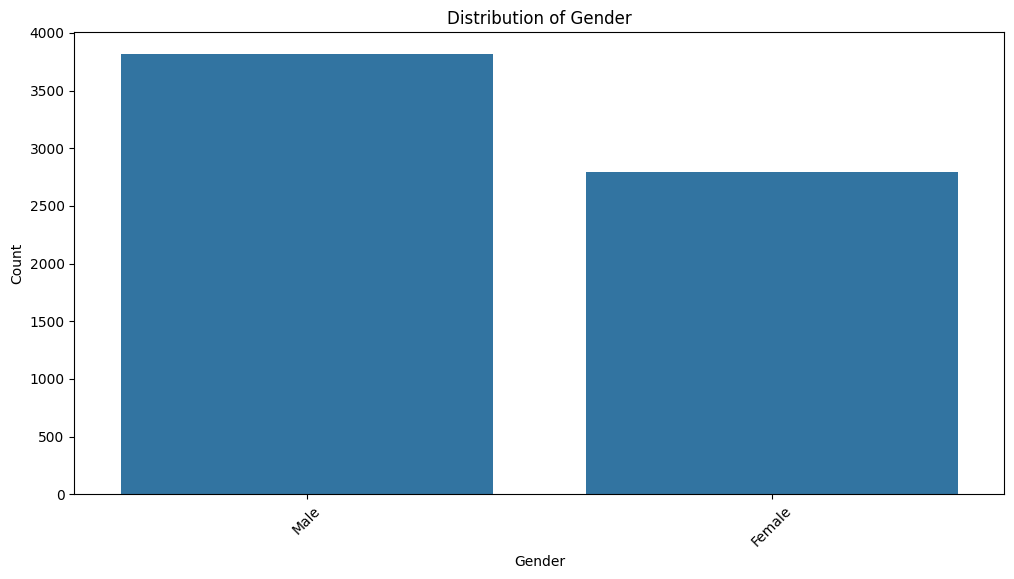

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x = "Gender")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Preprocessing

### 1- Handle Null Values

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

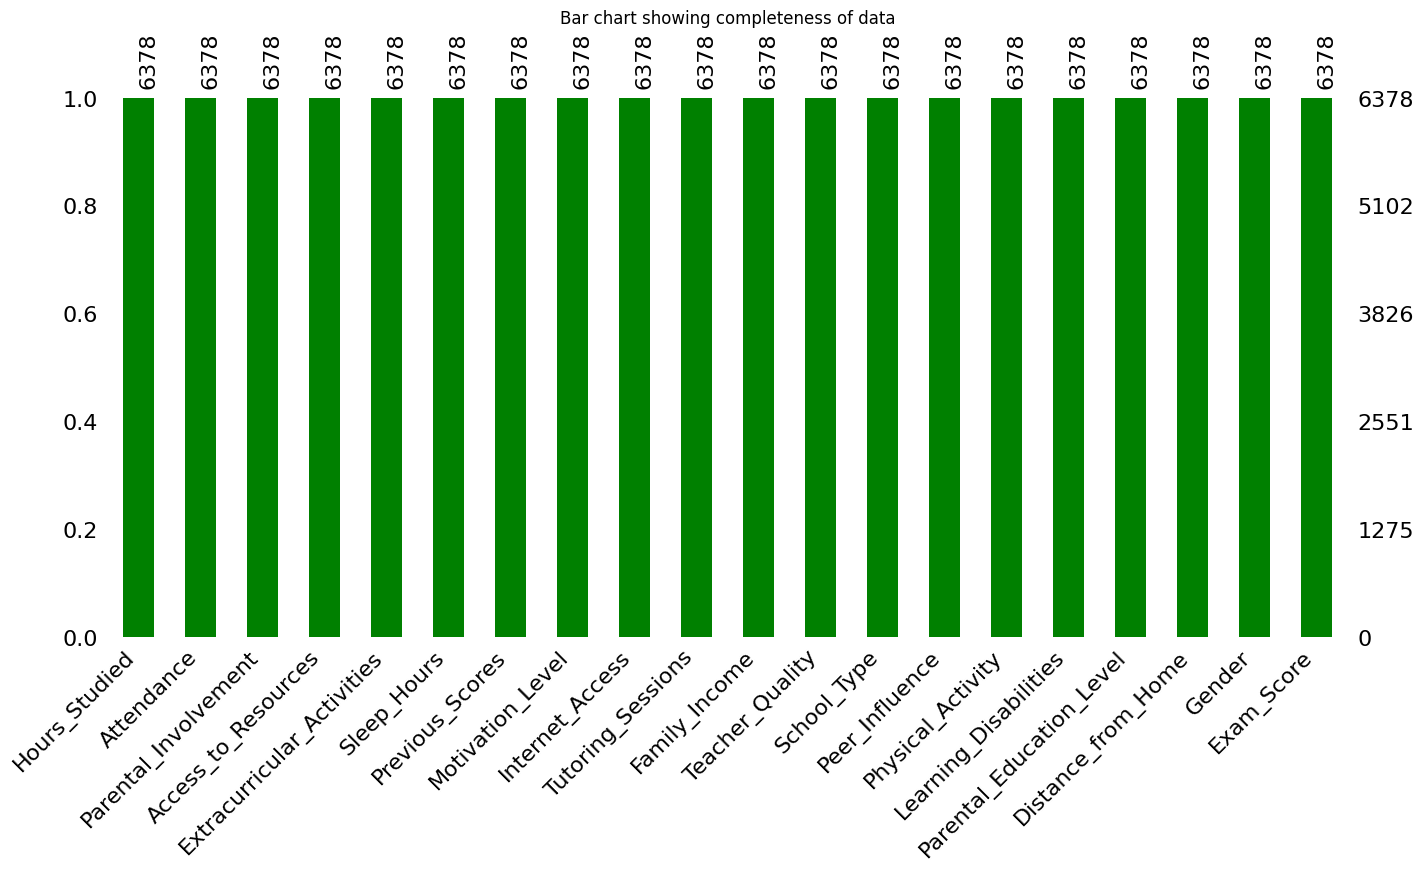

In [17]:
msno.bar(figsize=(16, 7), df = df, color = "green")
plt.title("Bar chart showing completeness of data")
plt.xticks(rotation = 90)
plt.show()

### 2- Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
ordinal_maps = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2},
    'Peer_Influence': {'Negative': 0, 'Neutral': 1, 'Positive': 2}
}

for col, mapping in ordinal_maps.items():
    df[col] = df[col].map(mapping)

In [20]:
dummies_maps = [
    'Extracurricular_Activities', 
    'Internet_Access', 
    'Learning_Disabilities', 
    'School_Type', 
    'Gender'
]

df = pd.get_dummies(df, columns=dummies_maps, drop_first=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6378 non-null   int64
 1   Attendance                      6378 non-null   int64
 2   Parental_Involvement            6378 non-null   int64
 3   Access_to_Resources             6378 non-null   int64
 4   Sleep_Hours                     6378 non-null   int64
 5   Previous_Scores                 6378 non-null   int64
 6   Motivation_Level                6378 non-null   int64
 7   Tutoring_Sessions               6378 non-null   int64
 8   Family_Income                   6378 non-null   int64
 9   Teacher_Quality                 6378 non-null   int64
 10  Peer_Influence                  6378 non-null   int64
 11  Physical_Activity               6378 non-null   int64
 12  Parental_Education_Level        6378 non-null   int64
 13  Distance

In [22]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,School_Type_Public,Gender_Male
0,23,84,0,2,7,73,0,0,0,1,2,3,0,0,67,False,True,False,True,True
1,19,64,0,1,8,59,0,2,1,1,0,4,1,1,61,False,True,False,True,False
2,24,98,1,1,7,91,1,2,1,1,1,4,2,0,74,True,True,False,True,True
3,29,89,0,1,8,98,1,1,1,1,0,4,0,1,71,True,True,False,True,True
4,19,92,1,1,6,65,1,3,1,2,1,4,1,0,70,True,True,False,True,False


### 3- Check Duplicates

In [23]:
print(df.duplicated().sum())

0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6378 non-null   int64
 1   Attendance                      6378 non-null   int64
 2   Parental_Involvement            6378 non-null   int64
 3   Access_to_Resources             6378 non-null   int64
 4   Sleep_Hours                     6378 non-null   int64
 5   Previous_Scores                 6378 non-null   int64
 6   Motivation_Level                6378 non-null   int64
 7   Tutoring_Sessions               6378 non-null   int64
 8   Family_Income                   6378 non-null   int64
 9   Teacher_Quality                 6378 non-null   int64
 10  Peer_Influence                  6378 non-null   int64
 11  Physical_Activity               6378 non-null   int64
 12  Parental_Education_Level        6378 non-null   int64
 13  Distance

### 4- Outliers

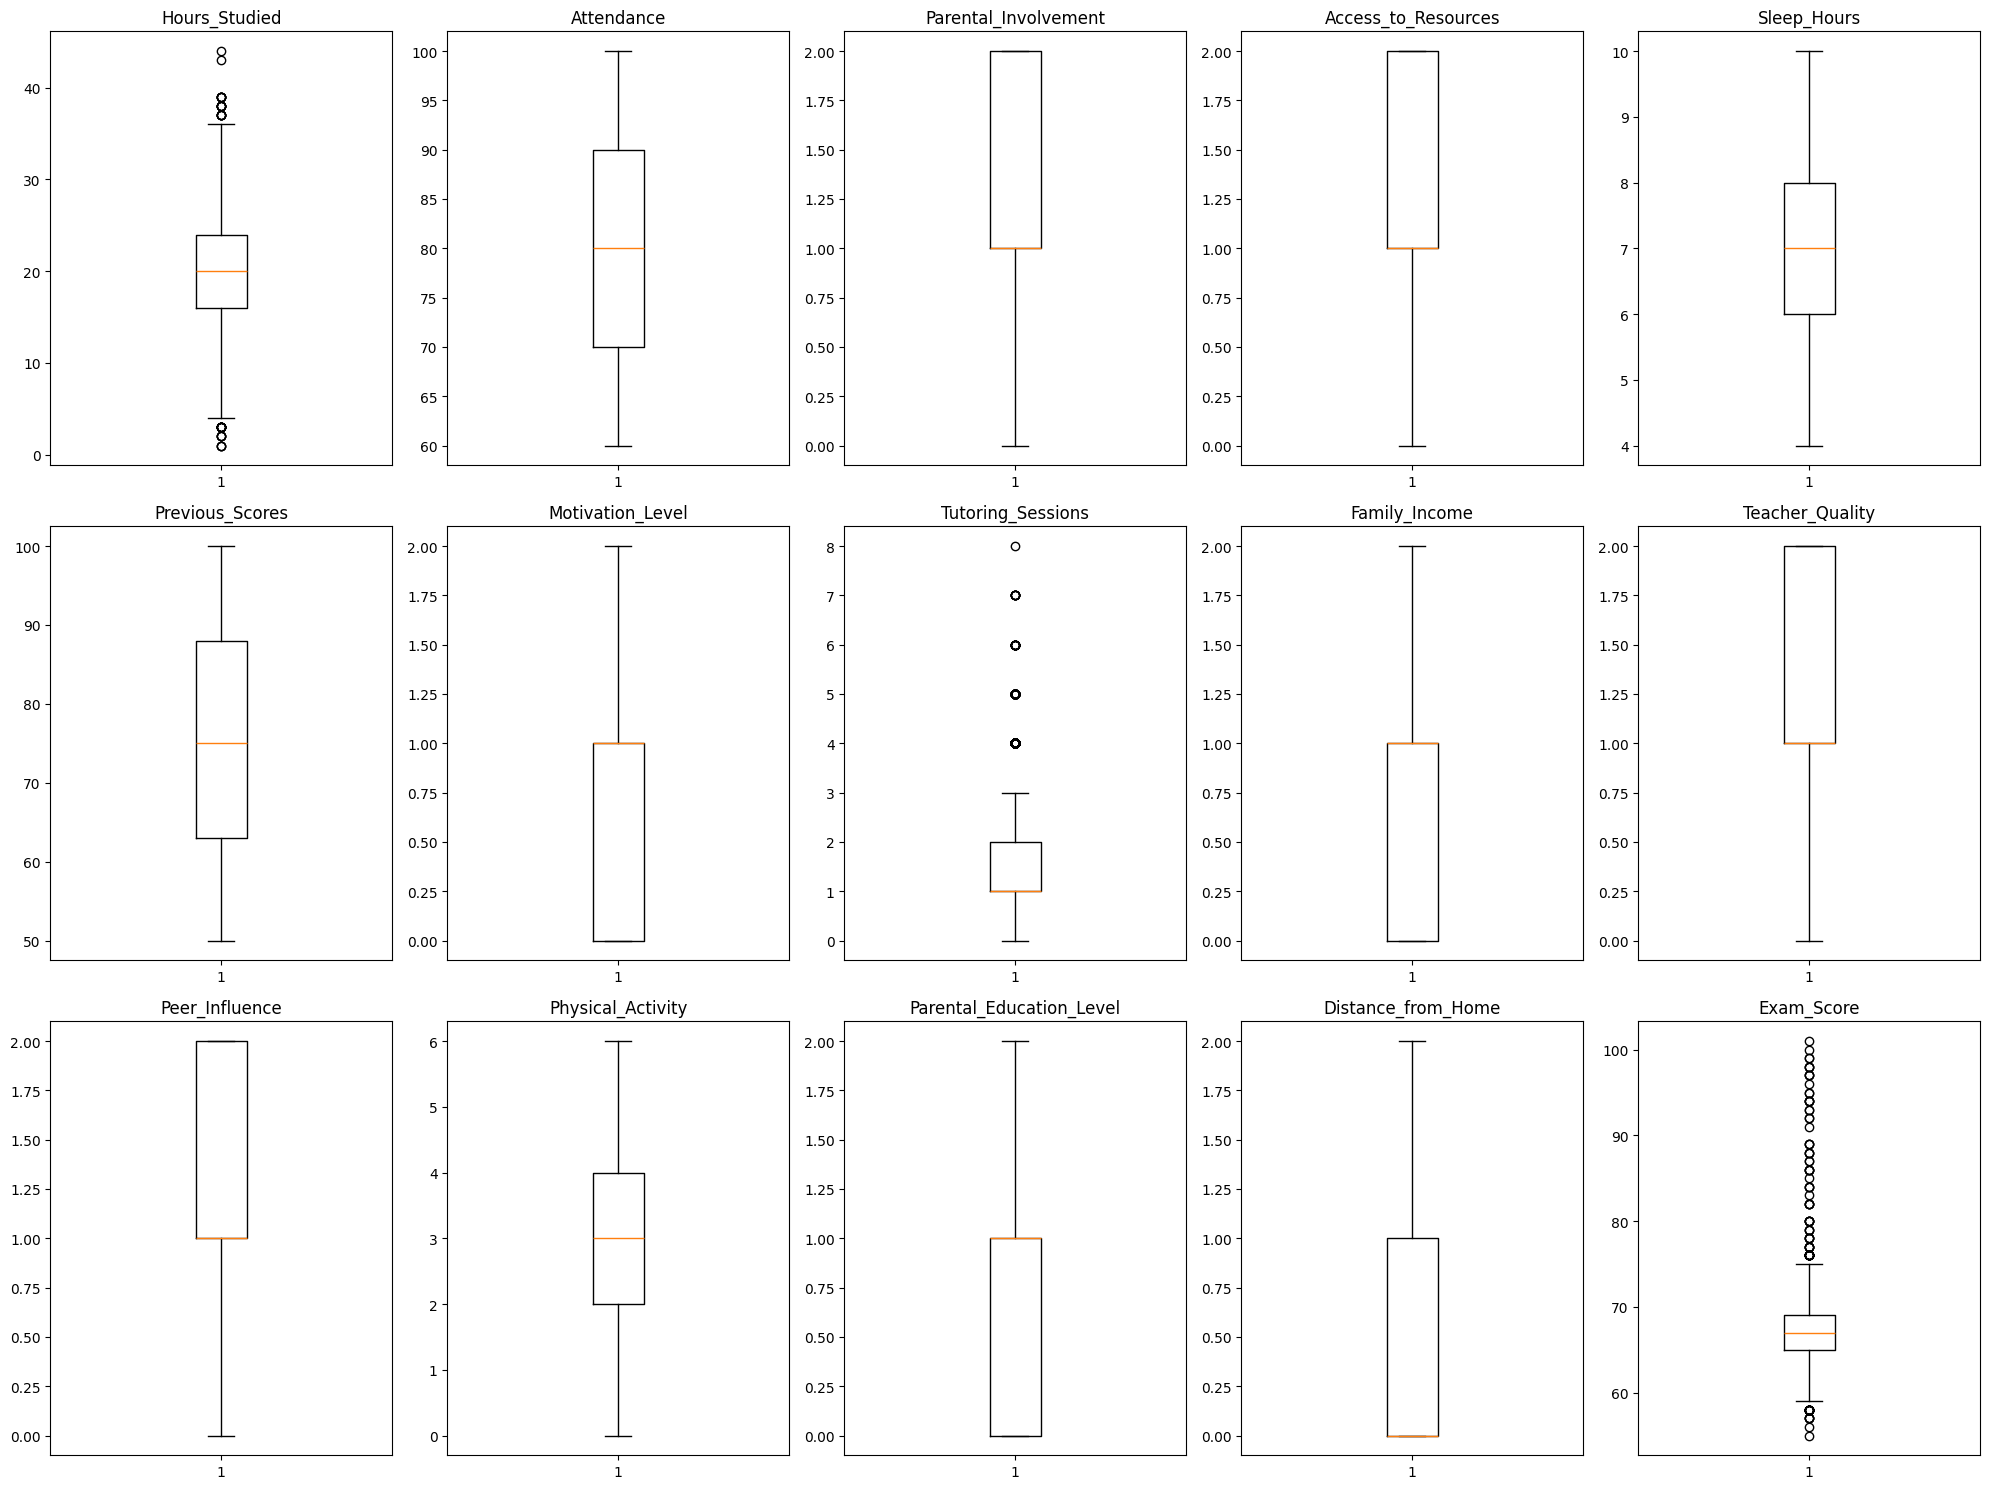

In [25]:
numCol = df.select_dtypes(['int64']).columns

import math

num_plots = len(numCol)
rows = math.ceil(num_plots / 5)  
plt.figure(figsize=(20, rows*5))

for i, col in enumerate(numCol):
    plt.subplot(rows, 5, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [26]:
for col in numCol:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    MAX = Q3 + 1.5 * IQR
    MIN = Q1 - 1.5 * IQR

    df = df[(df[col] >= MIN) & (df[col] <= MAX)]

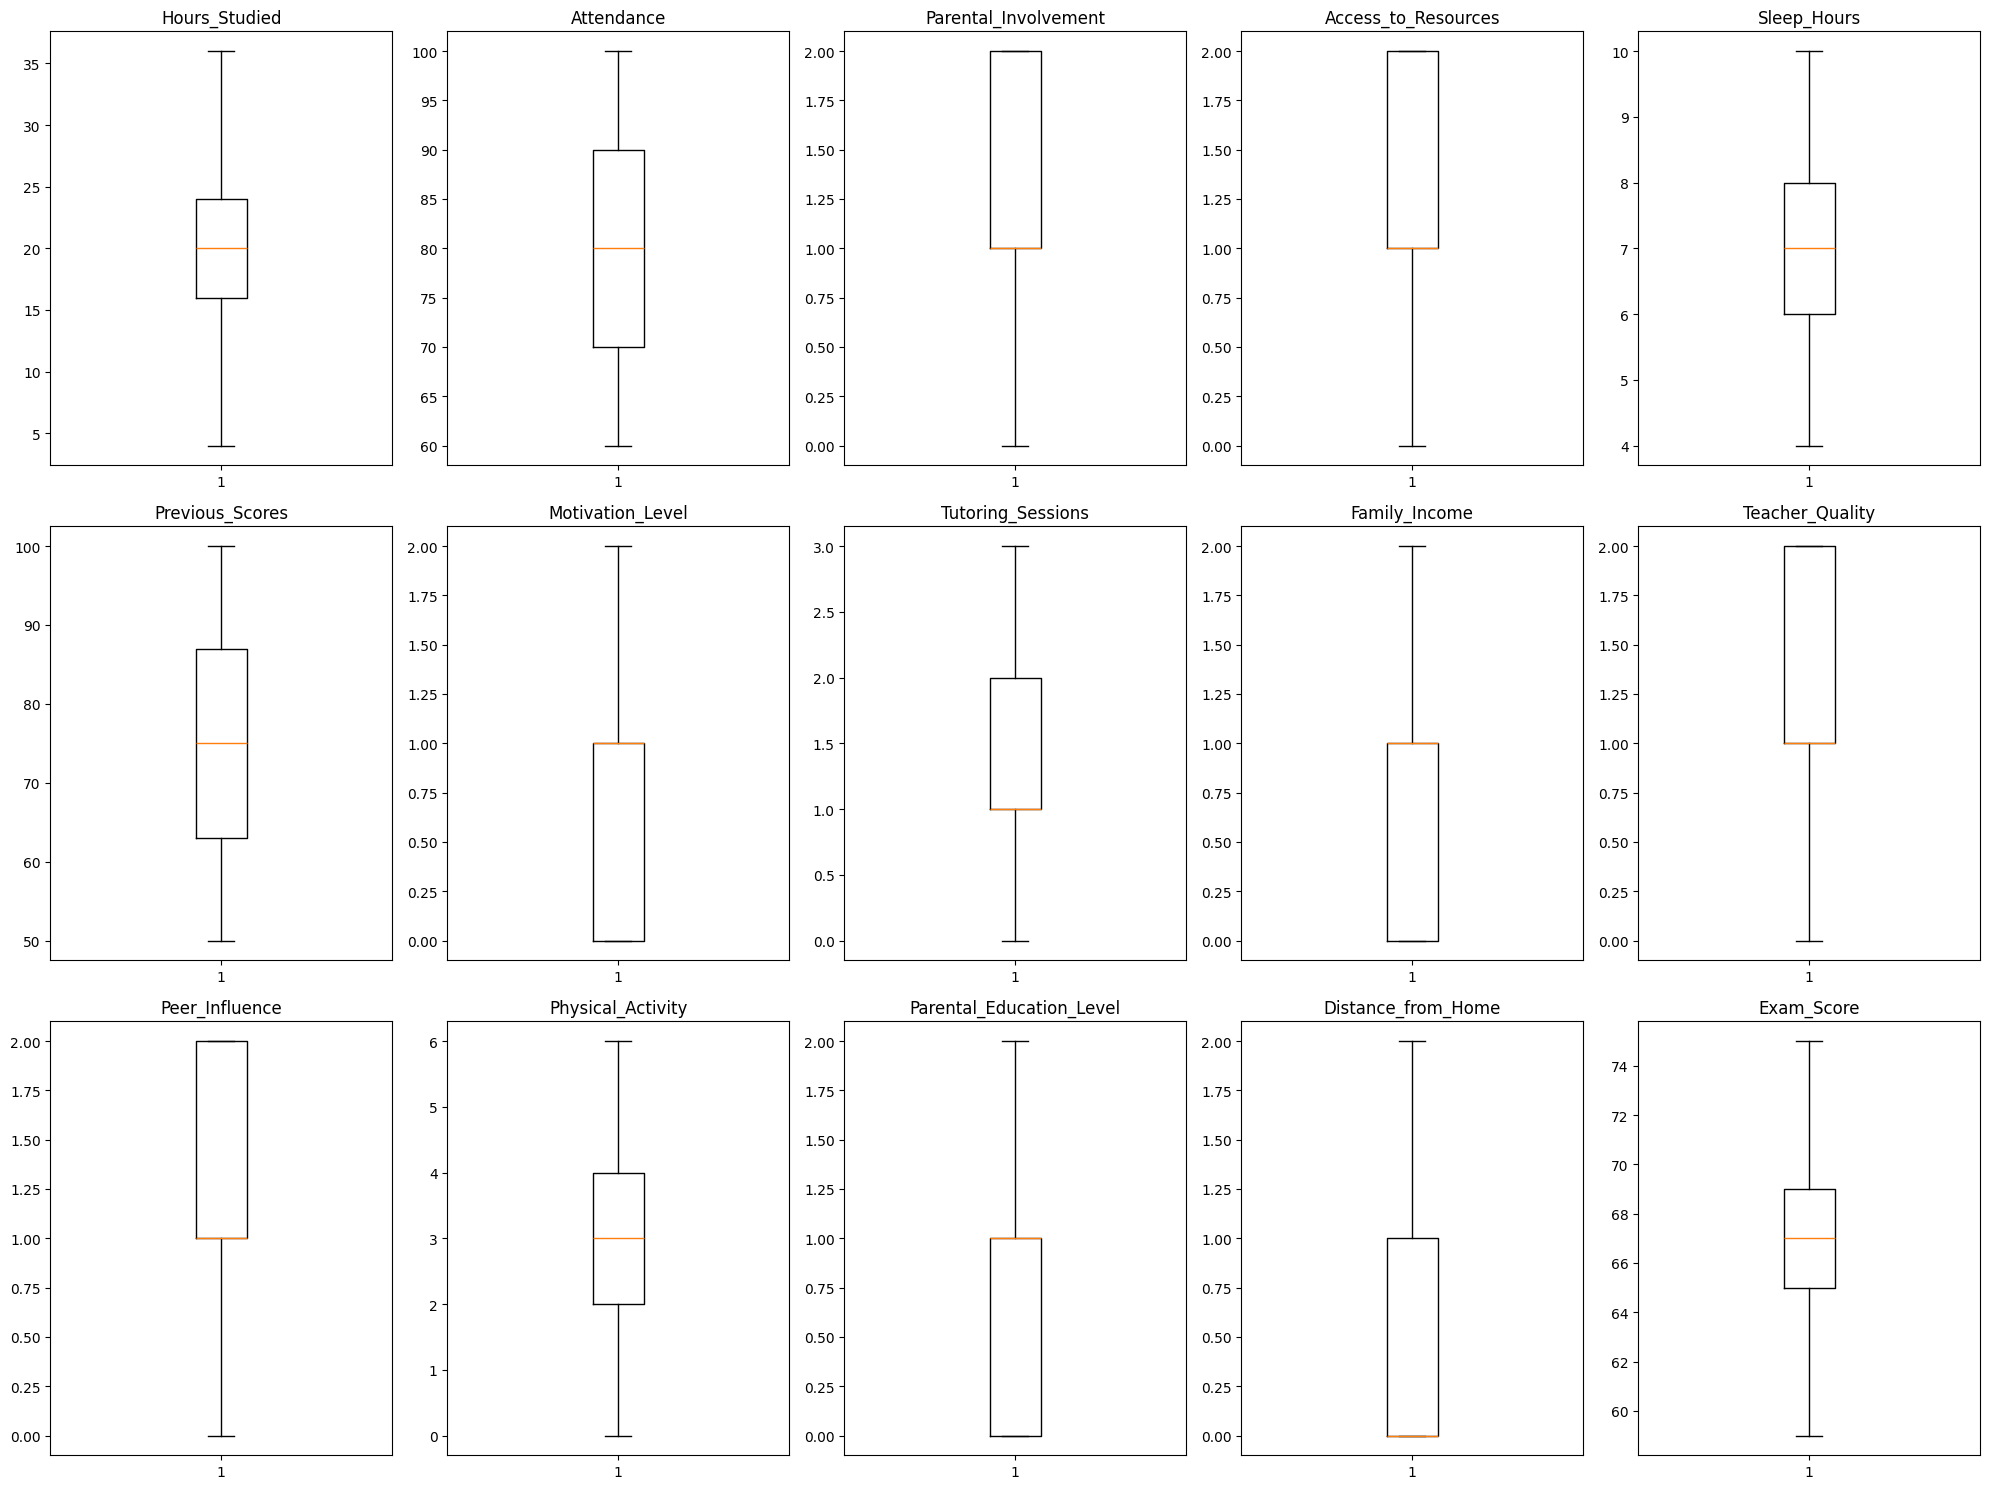

In [27]:
numCol = df.select_dtypes(['int64']).columns

num_plots = len(numCol)
rows = math.ceil(num_plots / 5)  
plt.figure(figsize=(20, rows*5))

for i, col in enumerate(numCol):
    plt.subplot(rows, 5, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

### 5- Splitting

In [28]:
x = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

print('train shape')
print('Xtrain --->', x_train.shape)
print('Ytrain --->', y_train.shape)

print('Test shape')
print('XTest --->', x_test.shape)
print('YTest --->', y_test.shape)

train shape
Xtrain ---> (4668, 19)
Ytrain ---> (4668,)
Test shape
XTest ---> (1168, 19)
YTest ---> (1168,)


### Model Building -> Linear Regression

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Prediction shape')
print('y_test --->', y_test.shape)
print('y_pred --->', y_pred.shape)

Prediction shape
y_test ---> (1168,)
y_pred ---> (1168,)


### Preformance Measure

In [31]:
rmse_test = mean_squared_error(y_test, y_pred)
mae_test  = mean_absolute_error(y_test, y_pred)
r2_test   = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f'Test RMSE: {rmse_test:.3f}')
print(f'Test MAE : {mae_test:.3f}')
print(f'Test R²  : {r2_test:.3f}')
print(50 * "-")

print("Model Coefficients:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Performance Metrics:
Test RMSE: 0.097
Test MAE : 0.264
Test R²  : 0.990
--------------------------------------------------
Model Coefficients:
Coefficients: [ 0.29905329  0.20006762  0.99361522  1.003896    0.01769409  0.04942653
  0.50573761  0.502939    0.4939363   0.49806069  0.49673564  0.23577249
  0.50483569 -0.50439069  0.50122885  0.9891408  -1.00388202 -0.00110371
 -0.0018615 ]
Intercept: 34.37997456215912


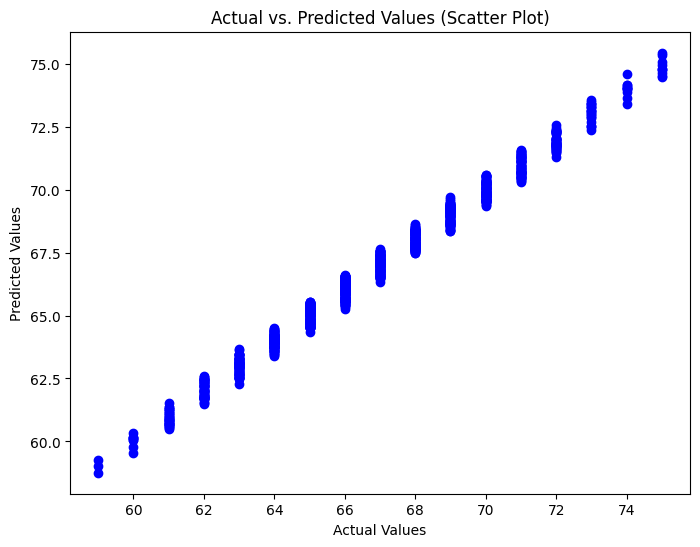

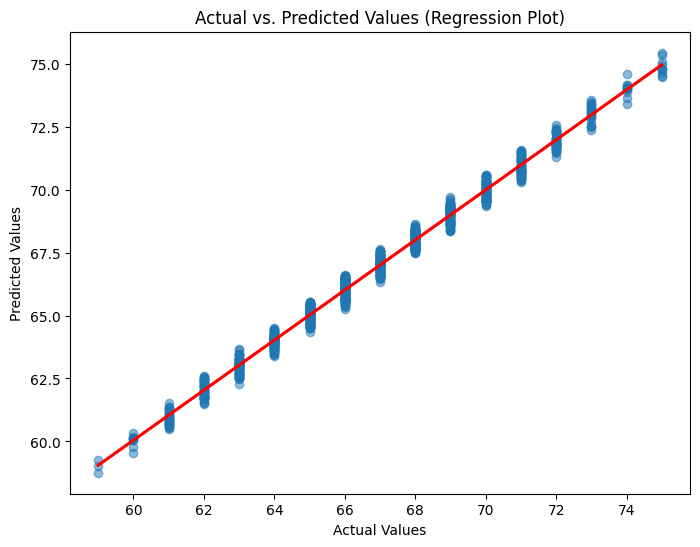

In [32]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted Values (Scatter Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Actual vs. Predicted Values (Regression Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

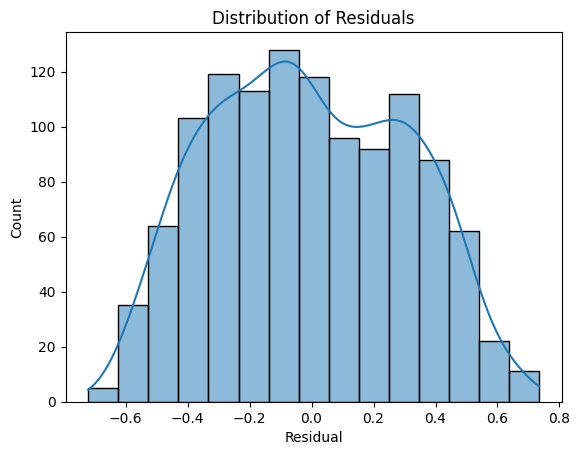

In [33]:
sns.histplot((y_test - y_pred), kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()

Bonus : polynomial regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures


X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2]
results = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)
    
    results.append((d, rmse, mae, r2))

print("Degree | RMSE   | MAE    | R²")
print("--------------------------------")
for d, rmse, mae, r2 in results:
    print(f"{d:<6} | {rmse:.3f} | {mae:.3f} | {r2:.3f}")


Degree | RMSE   | MAE    | R²
--------------------------------
1      | 0.311 | 0.264 | 0.990
2      | 0.316 | 0.268 | 0.990


based on these results the linear regression model is better than the polynomial regression in this task